# Pycaret

The Pycaret documentation is brilliant . These can be found at https://pycaret.gitbook.io/docs/get-started/tutorials

The example classificaiton notebook can be found here and so playing around in this notebook can be found below here 

https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb


Please note the install of pycaret does not work with the latest scikit learn and you need to use your own environment.

If using anaconda this helps you set up an environment 
https://medium.com/swlh/setting-up-a-conda-environment-in-less-than-5-minutes-e64d8fc338e4

If using Python this will help you set up the environment 
https://realpython.com/lessons/creating-virtual-environment/

Installation instructions for pycaret can be found here
https://pycaret.readthedocs.io/en/latest/installation.html







### Pycaret Cheat Sheet

![alt text](https://1927305171-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FFLpROzBBqocwXBoemLJC%2Fuploads%2F8JjVrKXaJnL6UKkQRivn%2Fimage.png?alt=media&token=439fa5e0-1495-443a-86b8-9cfc492e70e0)`



![alt text](https://1927305171-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FFLpROzBBqocwXBoemLJC%2Fuploads%2FMKRdn96DRhG2DRPLXRY0%2Fimage.png?alt=media&token=c99bcebf-0aa1-47ca-a715-e7ccf480f321)

In [ ]:
!jupyter nbconvert --to webpdf --allow-chromium-download pycaret.ipynb

[NbConvertApp] Converting notebook pycaret.ipynb to webpdf
[NbConvertApp] Building PDF
[INFO] Starting Chromium download.
100%|████████████████████████████████████████| 109M/109M [00:26<00:00, 4.06Mb/s]
[INFO] Beginning extraction
[INFO] Chromium extracted to: /home/pete/.local/share/pyppeteer/local-chromium/588429
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1060370 bytes to pycaret.pdf


# Where does Pycaret fit in?

![alt text](https://miro.medium.com/max/1400/0*68siepZnQhB_2lcG.png)



In [1]:
# !pip install pycaret[full]

In [2]:
from pycaret import classification as cla


In [3]:
import sklearn
from sklearn import datasets
import pandas as pd
import copy
from sklearn.model_selection import train_test_split

cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
y = pd.DataFrame(cancer['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

In [4]:
train_dataset = copy.deepcopy(X_train)
train_dataset.insert(loc = 0, column = 'target', value = y_train)
# train_dataset['target'].replace([0, 1], ["0", "1"], inplace = True)
train_dataset.head()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
82,0,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.28670,0.2355,0.10510
39,0,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,...,15.53,26.02,107.30,740.4,0.1610,0.4225,0.5030,0.22580,0.2807,0.10710
271,1,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,...,12.32,16.18,78.27,457.5,0.1358,0.1507,0.1275,0.08750,0.2733,0.08022
79,1,12.86,18.00,83.19,506.3,0.09934,0.09546,0.03889,0.02315,0.1718,...,14.24,24.82,91.88,622.1,0.1289,0.2141,0.1731,0.07926,0.2779,0.07918
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758


In [5]:
train_dataset.shape

(512, 31)

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using the numeric_features and categorical_features parameters in setup()

Infomation on setup params is here

https://pycaret.gitbook.io/docs/get-started/preprocessing/other-setup-parameters

In [6]:
exp_clf01 = cla.setup(data=train_dataset, target="target", session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(512, 31)"
4,Transformed data shape,"(512, 31)"
5,Transformed train set shape,"(358, 31)"
6,Transformed test set shape,"(154, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

session_id : A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

Target Type : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

Label Encoded : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric.

Original Data : Displays the original shape of the dataset. In this experiment (22800, 24) means 22,800 samples and 24 features including the target column.

Missing Values : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

Numeric Features : The number of features inferred as numeric. In this dataset, 14 out of 24 features are inferred as numeric.

Categorical Features : The number of features inferred as categorical. In this dataset, 9 out of 24 features are inferred as categorical.

Transformed Train Set : Displays the shape of the transformed training set. Notice that the original shape of (22800, 24) is transformed into (15959, 91) for the transformed train set and the number of features have increased to 91 from 24 due to categorical encoding

Transformed Test Set : Displays the shape of the transformed test/hold-out set. There are 6841 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.
Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation (in this case there are no missing values in the training data, but we still need imputers for unseen data), categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

In [7]:
cla.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


After this step we have now added xgboost the library of algorithms that pycaret calls upon to find the best model

In [8]:
best = cla.compare_models() # compare

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9636,0.9881,0.9818,0.9619,0.9712,0.9215,0.9240,0.0530
xgboost,Extreme Gradient Boosting,0.9607,0.9877,0.9727,0.9651,0.9683,0.9166,0.9183,0.0250
rf,Random Forest Classifier,0.9553,0.9866,0.9729,0.9578,0.9645,0.9040,0.9068,0.0610
ada,Ada Boost Classifier,0.9525,0.9852,0.9731,0.9532,0.9625,0.8977,0.8999,0.0340
lightgbm,Light Gradient Boosting Machine,0.9494,0.9853,0.9727,0.9482,0.9597,0.8919,0.8948,0.0240
lda,Linear Discriminant Analysis,0.9440,0.9916,0.9909,0.9270,0.9572,0.8758,0.8829,0.0090
gbc,Gradient Boosting Classifier,0.9413,0.9891,0.9636,0.9439,0.9526,0.8752,0.8788,0.0590
ridge,Ridge Classifier,0.9356,0.0000,0.9775,0.9252,0.9499,0.8598,0.8650,0.0080
lr,Logistic Regression,0.9328,0.9892,0.9591,0.9371,0.9466,0.8553,0.8601,0.2650
qda,Quadratic Discriminant Analysis,0.9274,0.9815,0.9322,0.9521,0.9402,0.8473,0.8523,0.0090


Above we have an output of the default settings for each algorithm and we have the respective metrics printed for each algorithm. By default the output sorts by accuracy however if you add the argument sort = 'metric' and replace metric with the metric you want it will sort the table in a different order. we can run print(best) below the get the name and hyper parametrs of the best algorithm

In [9]:
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


If we want to investigate a specific model we use the create model function and pass in the string name of that algorithm as we seel below with decision trees and KNN

In [10]:
dt = cla.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8611,0.8474,0.9091,0.8696,0.8889,0.7039,0.7052
1,0.9167,0.9188,0.9091,0.9524,0.9302,0.8269,0.8283
2,0.9722,0.9643,1.0000,0.9565,0.9778,0.9408,0.9424
3,0.9444,0.9545,0.9091,1.0000,0.9524,0.8861,0.8919
4,0.9722,0.9643,1.0000,0.9565,0.9778,0.9408,0.9424
5,0.9167,0.9318,0.8636,1.0000,0.9268,0.8312,0.8433
6,0.9167,0.9013,0.9565,0.9167,0.9362,0.8163,0.8179
7,0.9167,0.9348,0.8696,1.0000,0.9302,0.8280,0.8405
8,0.9143,0.8846,1.0000,0.8800,0.9362,0.8073,0.8228


In [11]:
knn = cla.create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.8961,0.8636,0.8636,0.8636,0.6494,0.6494
1,0.8611,0.8620,0.9545,0.8400,0.8936,0.6959,0.7078
2,0.9444,0.9886,0.9545,0.9545,0.9545,0.8831,0.8831
3,0.9167,0.9529,0.9091,0.9524,0.9302,0.8269,0.8283
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,0.9627,0.9091,0.9524,0.9302,0.8269,0.8283
6,0.9444,0.9415,1.0000,0.9200,0.9583,0.8754,0.8823
7,0.9167,0.9699,1.0000,0.8846,0.9388,0.8099,0.8249
8,0.9429,0.9510,1.0000,0.9167,0.9565,0.8736,0.8807


In [12]:
rf = cla.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9188,0.9545,0.8750,0.9130,0.7600,0.7655
1,0.9722,0.9903,0.9545,1.0000,0.9767,0.9423,0.9439
2,0.9722,1.0000,1.0000,0.9565,0.9778,0.9408,0.9424
3,0.9444,1.0000,0.9091,1.0000,0.9524,0.8861,0.8919
4,0.9722,1.0000,1.0000,0.9565,0.9778,0.9408,0.9424
5,0.9722,0.9919,0.9545,1.0000,0.9767,0.9423,0.9439
6,0.9167,0.9900,0.9565,0.9167,0.9362,0.8163,0.8179
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9429,0.9755,1.0000,0.9167,0.9565,0.8736,0.8807


In [13]:
lg = cla.create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9968,1.0000,0.8800,0.9362,0.8176,0.8315
1,0.8889,0.9805,0.9545,0.8750,0.9130,0.7600,0.7655
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9167,0.9903,0.9091,0.9524,0.9302,0.8269,0.8283
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,0.9838,0.8636,1.0000,0.9268,0.8312,0.8433
6,0.9444,0.9933,1.0000,0.9200,0.9583,0.8754,0.8823
7,0.9444,0.9933,1.0000,0.9200,0.9583,0.8754,0.8823
8,0.9429,0.9825,0.9545,0.9545,0.9545,0.8776,0.8776


Now that we have one model we can tune the hyper paramters in one line of code. Lets do that for the decission tree

In [14]:
tuned_rf = cla.tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9286,0.9545,0.9130,0.9333,0.8224,0.8238
1,0.9722,0.9935,0.9545,1.0000,0.9767,0.9423,0.9439
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9167,0.9968,0.8636,1.0000,0.9268,0.8312,0.8433
4,0.9722,1.0000,1.0000,0.9565,0.9778,0.9408,0.9424
5,0.9722,0.9935,0.9545,1.0000,0.9767,0.9423,0.9439
6,0.9722,0.9900,1.0000,0.9583,0.9787,0.9388,0.9405
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9429,0.9860,1.0000,0.9167,0.9565,0.8736,0.8807


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Note the accuracy of this RF 95.79% where as using defult paramters it was 95.5%. We can view the parameters using the print function

In [15]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=260,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [16]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


We notice the difference in the min_samples leaf parameter for example

We can also specify the metric we want to optimise using the optimise hyper paramter. For example if we wanted to optimise AUC, lets look below

In [17]:
tuned_dt_auc = cla.tune_model(dt, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8056,0.8766,0.8636,0.8261,0.8444,0.5855,0.5866
1,0.8889,1.0000,0.8182,1.0000,0.9000,0.7778,0.7977
2,0.9722,1.0000,0.9545,1.0000,0.9767,0.9423,0.9439
3,0.8611,0.9692,0.8636,0.9048,0.8837,0.7115,0.7127
4,0.8611,0.8831,0.9091,0.8696,0.8889,0.7039,0.7052
5,0.9167,0.9708,0.9091,0.9524,0.9302,0.8269,0.8283
6,0.8611,0.9097,0.8696,0.9091,0.8889,0.7039,0.7052
7,0.9167,0.9967,0.8696,1.0000,0.9302,0.8280,0.8405
8,0.9429,0.9353,0.9545,0.9545,0.9545,0.8776,0.8776


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [18]:
# import xgboost as xgboost
# xgb = cla.create_model('xgboost')

In [19]:
xgb = cla.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9318,0.9545,0.8750,0.9130,0.7600,0.7655
1,0.9722,0.9903,0.9545,1.0000,0.9767,0.9423,0.9439
2,0.9722,1.0000,1.0000,0.9565,0.9778,0.9408,0.9424
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9444,0.9968,0.9545,0.9545,0.9545,0.8831,0.8831
6,0.9722,0.9933,1.0000,0.9583,0.9787,0.9388,0.9405
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9714,0.9860,1.0000,0.9565,0.9778,0.9378,0.9397


In [20]:
xgb_tuned = cla.tune_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9513,1.0000,0.8800,0.9362,0.8176,0.8315
1,0.9167,0.9903,0.9545,0.9130,0.9333,0.8224,0.8238
2,0.9722,1.0000,1.0000,0.9565,0.9778,0.9408,0.9424
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9722,1.0000,1.0000,0.9565,0.9778,0.9408,0.9424
5,0.9722,0.9708,1.0000,0.9565,0.9778,0.9408,0.9424
6,0.9167,0.9866,1.0000,0.8846,0.9388,0.8099,0.8249
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9714,0.9895,1.0000,0.9565,0.9778,0.9378,0.9397


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Visualising our results

The documentation for plotting models can be found here for pycaret

https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model

we shall look at a couple of plots looking at the tuned_dt

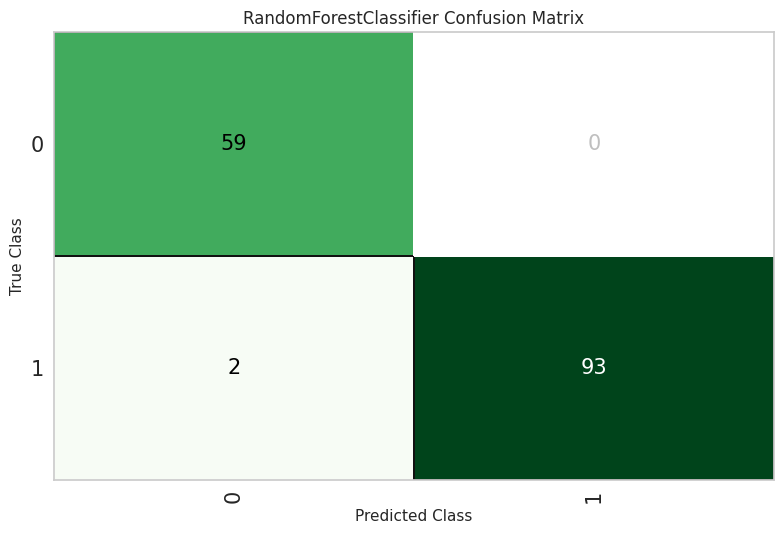

In [21]:
cla.plot_model(tuned_rf, 'confusion_matrix')

We can also view the ROC curve for our classifier

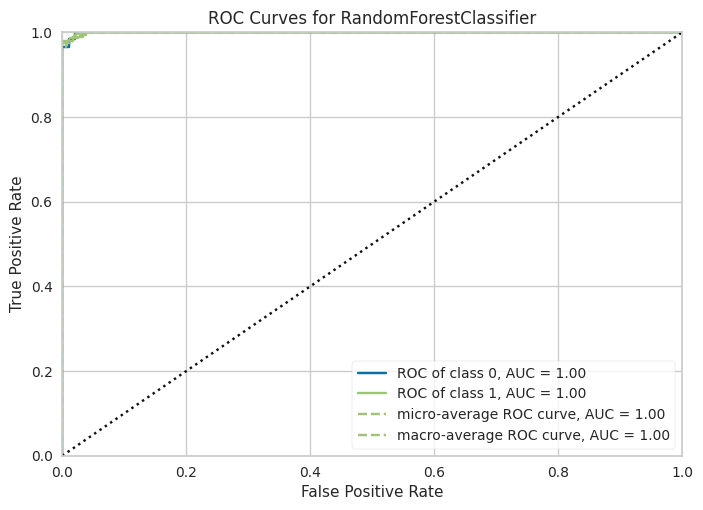

In [22]:
cla.plot_model(tuned_rf, 'auc')

Similarly we can look at the precision recall graph 

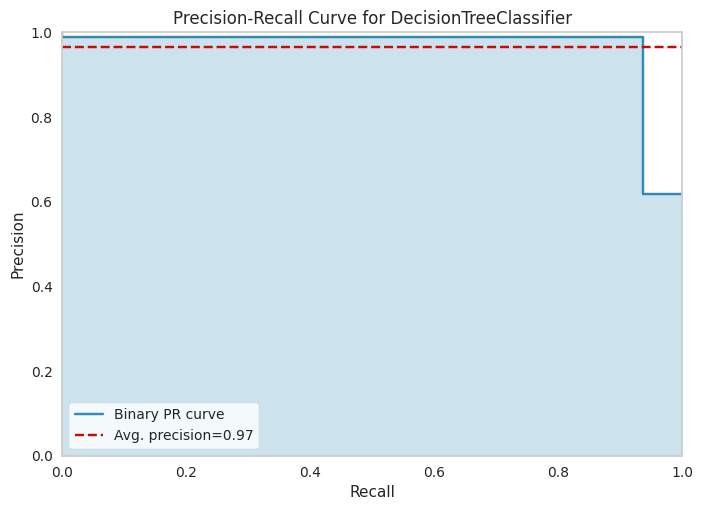

In [23]:
cla.plot_model(dt, plot = 'pr')

We can look at a plot of feature importance

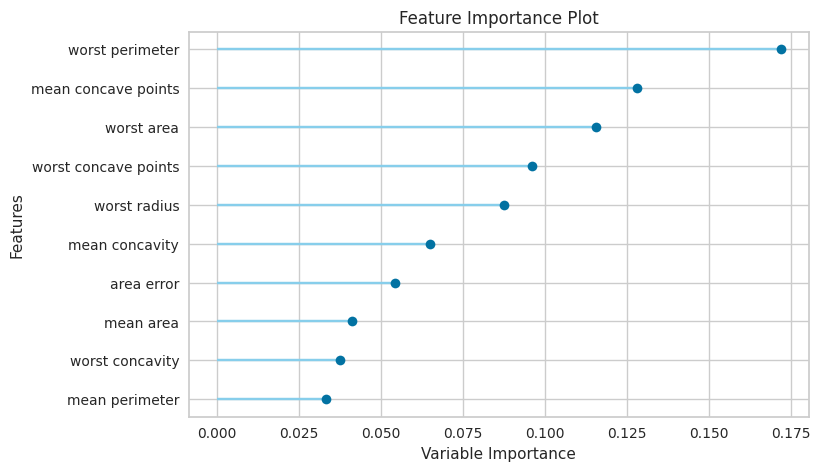

In [23]:
cla.plot_model(tuned_rf, plot='feature')

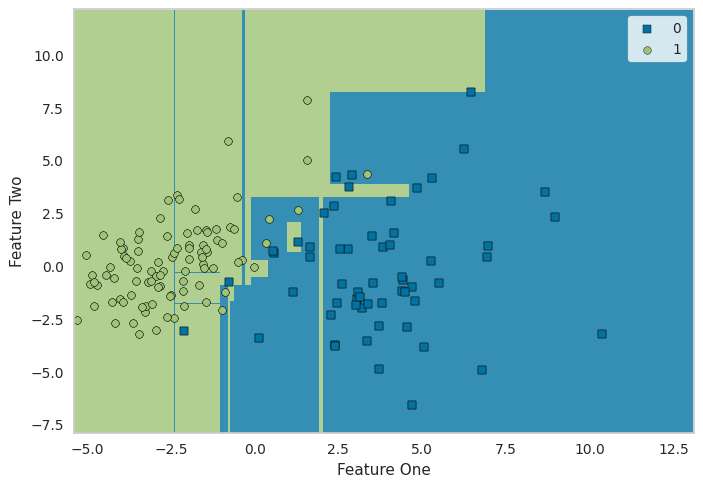

In [17]:
cla.plot_model(dt, plot='boundary')

In [ ]:
cla.plot_model(dt, plot='boundary')

We can also use the evaluate function to give us an interactive gui for many of these plotting fuctions

In [ ]:
cla.evaluate_model(dt)

We can use the interpret model function in order to visualise how how model is making its predictions

In [ ]:
cla.interpret_model(dt)


SHAP stands for Shapley additave explanations. Shap is used whenever you have a complicated model (not like logisitic or linear regression) but more like XGBoost or Random Forest and you want to understand how the model is making its decissions. SHAP effectively is used to demistify the black box model. 

Shap values measure the contribution of each feature to a prediction. Shap values quantify how much each feature contributes to a prediction and how much each feature affects the output of the model. Shap values are calculated by taking the difference between the model’s output without a given feature and the model’s output with the feature included. The higher the Shap value, the more the feature contributes to the model’s output. The Shap package in Python can be used to calculate Shap values for a given model and data set.



### Predictions 

All of the analysis we have seen so far the set up used cross validation to evaluate performance. If we are happy with things now we can use the predict method in order to see how it does on the test data. Pycaret already separated out our training and testing data for us so using predict will only run the model on the hold out data/

In [ ]:
cla.predict_model(tuned_rf)

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [ ]:
final_rf = cla.finalize_model(tuned_rf)

Note once the model is finialised all of the data is used in the training of the model. 

Caution: One final word of caution. Once the model is finalized using finalize_model(), the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after finalize_model() is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use final_rf under predict_model() to compare the information grid with the one above in section 11.

In [ ]:
cla.predict_model(final_rf);

We can now predict on our test data that we held back from the model


In [ ]:
unseen_predictions = cla.predict_model(final_rf, data=X_test)
unseen_predictions.head()

##  Loading and Saving models

In [ ]:
cla.save_model(final_rf,'Final RF 20220712')

And to load the model back in

In [ ]:
saved_final_rf = cla.load_model('Final RF 20220712')

### The dashboard
Pycaret offers an interactive dashboard feature where you can explore all the graphs and performance of your model in a web browser. Below we give an example of exploring our tuned random forest.



So far we have seen graphs that have used the SHAP value to understand feature importanc, however we can also look at permutation importance. These are briefly explained below.

SHAP stands for Shapley additave explanations. Shap is used whenever you have a complicated model (not like logisitic or linear regression) but more like XGBoost or Random Forest and you want to understand how the model is making its decissions. SHAP effectively is used to demistify the black box model. 

Shap values measure the contribution of each feature to a prediction. Shap values quantify how much each feature contributes to a prediction and how much each feature affects the output of the model. Shap values are calculated by taking the difference between the model’s output without a given feature and the model’s output with the feature included. The higher the Shap value, the more the feature contributes to the model’s output. The Shap package in Python can be used to calculate Shap values for a given model and data set.


More can be read about this on 
https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30

Permutation importance is a technique used in machine learning to measure the importance+ of each feature in a predictive model. It works by randomly shuffling the values of a single feature, and then measuring how much the model’s performance decreases. The features that cause the biggest drop in model performance are the most important features. This technique can be useful for understanding which features are most important for a model, and for identifying features that may not have a large effect on the model’s performance.

In [ ]:
# !pip install --pre -U pycaret
# !pip install --upgrade setuptools
# !pip install pycaret[analysis]


In [ ]:
exp_clf01.dashboard(rf)

## A Note on Scaling

So far we have used the defult paramters in the setup. This appeared fine for our numerical dataset and we had a range of accuracies when we compared performances on a range of models. However pycaret does not recognise if ceetain algorithms need numerical scaling or not. Where we did not numerically scale out data some algorithms could not perform at their best. To remind you what we mean by numerical scaling, "Numerical scaling in machine learning is a process of transforming numerical values from one range to another. This is often used to normalize data so that all features have the same range of values. This can help improve the accuracy and efficiency of machine learning algorithms."

Two commonly used approaches are min max scaling and standardisation. 

Min-max scaling (or min-max normalization) is a method used to normalize the values of a given dataset to a specific range, usually 0 to 1. It is a type of feature scaling that transforms the values of the dataset so that they are between a given minimum and maximum value (usually 0 and 1). The formula to apply min-max scaling is:

X_scaled = (X - Xmin) / (Xmax - Xmin)

where X is a value in the dataset, Xmin is the minimum value in the dataset, and Xmax is the maximum value in the dataset.

Standard scaling is a method of transforming data so that it has a mean of 0 and a standard deviation of 1. It is a technique used to normalize data so that machine learning algorithms can process the data more efficiently. It is a type of normalization that is used to ensure that all features have the same scale and that they are normally distributed. It is especially useful when dealing with large datasets with many different features.


We are now going to repeat the process of searching for the best model after we tweak the setup to apply numerical scaling. The defult scaler is the standard scaler

First lets see what dataset looked like going into the previous models. This is given below


In [ ]:
exp_clf01.dataset_transformed

Now we are going to start a new session where we put numerical scaling into the pipeline as you can see below 

In [ ]:
exp_clf02 = cla.setup(data=train_dataset, target="target", session_id=123, normalize=True, normalize_method='zscore')

You can see in the paramters now we have numerical scaling set up. We can now run the compare models method in order to see which algorithm works best

In [ ]:
best_model = exp_clf02.compare_models()

Looking at the output above some algorithms have very different performance. Logisitic regression originally had an accuracy 0.93 and this has changed to almost 0.97. We can also note that knn has moved from 0.91 to 0.96. However if we look at all of the tree based algorithms they have identical accuracies with DT at 0.9245 and xgboost at 0.9607. This goes to show the importance of numerical scaling to some algorithms and not others


Note : In the workshop we did not worry about scaling when we applied logisitic regression. In its basic for logisitic regression does not require any scaling. However there are hyper paramters for logisitic regression that can tune the way it behaves. These hyper paramters help regularise the algorithm. When these hyper parameters are set the algorithm does become sensitive to scaling hence why we see the difference in the accuracies as a result of scaling here.

## Controlling the set up stage of categorical data

Lets repeat the process with a dataset that contains categorical data 

The following documentation helps with options in controlling the setup parameters

https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.setup

Below we can look in more detail about how the imputation and encoding is working

In [ ]:
from pycaret.datasets import get_data
import numpy as np
employee = get_data('employee')

Lets see if we have any missing data in this dataset

In [ ]:
employee.isna().sum()

We do not have any missing data so we are going to insert some 

In [ ]:
employee.iloc[0:10,[0,1,2,3, 4, 5,6]]=np.nan
employee.iloc[0:10, [ 7,8]]=pd.NA


In [ ]:
employee.isna().sum()

Lets look at the the setup with the basic params

In [ ]:
clf_basic = cla.setup(data = employee, target = 'left')

We have 2 columns of categorical data here, department and salary. 

In [ ]:
clf_basic.dataset_transformed

In [ ]:
employee.nunique()

In [ ]:
clf_basic.variables['pipeline']

We can see that the encoder is endocing salary as a nominal variable when it actually a orindal variable. We therefore can tell the setup this. We shall also change the numerical imputation to knn

In [ ]:
clf = cla.setup(data = employee, target = 'left', 
           ordinal_features = {'salary' : ['low', 'medium', 'high']},
               categorical_imputation = 'mode',
               numeric_imputation = 'knn')

We can see we now have 4 categorical features of which 2 have been recognised as ordinal. I think only 1 feature here is ordinal So I am going to investiage this in the setup

In [ ]:
clf.variables['pipeline']

You can see that because the imputation strategy was to create a new value for the salary it has a new mapping. Lets change that strategy 

In [ ]:
clf.dataset_transformed

Notice how the department has not been one hote encoded. This is because y default any variables that have more than 5 unique varaibles will be chosen for oridnal encoding. However we want this as ohe so we will change this parameter

In [ ]:
clf = cla.setup(data = employee, target = 'left', 
           ordinal_features = {'salary' : ['low', 'medium', 'high']},
               categorical_imputation = 'mode',
               numeric_imputation = 'knn',
               max_encoding_ohe = 12,
               )

In [ ]:
clf.dataset_transformed

The step up class has lots of useful attributes and methods to explore how you wish you algorithm to run. The function below will give you a better look indisde the class

In [ ]:
from pprint import pprint
# pprint(vars(clf))

### Extra bits

If we want to use ensemble models using a bootstrap technique we can use the ensemble method. This may make it more robust

In [ ]:
bagged_dt = cla.ensemble_model(dt, method = 'Bagging')

Model blending is where you take multiple models and make predictions from a voting of many models. We can do this by taking the top 3 models from our model comparision as seen below

In [ ]:
top3 = cla.compare_models(n_select = 3)

In [ ]:
blender = cla.blend_models(top3)

# Regression in Pycaret

This section of notebook is based from the following https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

In [1]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


We are going to take 90% of this data that will go into the pycaret setup and leave 10% of the data that we will not touch untill the end

In [2]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [3]:
from pycaret import regression as reg
reg_1 = reg.setup(data = data, target = 'Price', session_id=123) 

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Data shape,"(5400, 18)"
4,Train data shape,"(3779, 18)"
5,Test data shape,"(1621, 18)"
6,Ordinal features,1
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


Below are the regression models available to me

In [4]:
reg_1.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [5]:
best = reg.compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,904.1340,3981461.4110,1915.9306,0.9624,0.1028,0.0774,0.1700
lightgbm,Light Gradient Boosting Machine,1156.3419,5207045.2826,2199.1421,0.9509,0.1266,0.0992,0.0850
xgboost,Extreme Gradient Boosting,1798.8411,11823597.9286,3387.8876,0.8858,0.2124,0.1760,0.1870
rf,Random Forest Regressor,2544.3694,15604459.6418,3906.3206,0.8486,0.2719,0.2521,0.3490
lr,Linear Regression,2512.6891,16385063.0187,4003.2239,0.8410,0.6664,0.2888,0.4640
lasso,Lasso Regression,2510.7492,16379300.0075,4002.4865,0.8410,0.6603,0.2884,0.0750
ridge,Ridge Regression,2510.1138,16384478.1322,4003.0069,0.8410,0.6548,0.2883,0.0580
llar,Lasso Least Angle Regression,2480.3476,16411412.6857,4004.4959,0.8409,0.6335,0.2804,0.0600
lar,Least Angle Regression,2516.3361,16425669.6600,4008.4664,0.8405,0.6710,0.2894,0.0660
et,Extra Trees Regressor,2781.1957,17005149.3214,4082.0004,0.8347,0.2906,0.2851,0.3160


The grid by default is sorted using R2 (highest to lowest) which can be changed by passing sort parameter. For example compare_models(sort = 'RMSLE') will sort the grid by RMSLE (lower to higher since lower is better). If you want to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For example compare_models(fold = 5) will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, compare_models return the best performing model based on default sort order but can be used to return a list of top N models by using n_select parameter


We will then focus in on one model

In [ ]:
gbr = reg.create_model('gbr')

We can tune this models hyper paramters. By defult it optimises R2 however we could change that in a hyperparameter

In [ ]:
gbr_tune = reg.tune_model(gbr, optimize = 'R2')

### Visualise your model

In [ ]:
gbr

In [ ]:
reg.plot_model(gbr)

In [ ]:
reg.plot_model(gbr, plot = 'error')

In [ ]:
reg.plot_model(gbr, plot = 'feature')

In [ ]:
reg.evaluate_model(gbr)

### Predict on your hold out data

We need to finialize our model first. During this process the model refits its model using the best parameters learnt and applies this on  all the data. 
final_lightgbm = finalize_model(tuned_lightgbm)

In [ ]:
final_reg = reg.finalize_model(gbr_tune)

In [ ]:
predictions = reg.predict_model(final_reg, data = data_unseen)

In [ ]:
predictions